In [56]:
from cvx.stat_arb.ccp import *
from utils import *
import seaborn as sns

sns.set()
sns.set(font_scale=1.5)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
prices_full = pd.read_csv("../data/stock_prices.csv", index_col=0, parse_dates=True)
market_cap = pd.read_csv("../data/market_cap.csv", index_col=0, parse_dates=True)
spreads = pd.read_csv("../data/spreads_stocks.csv", index_col=0, parse_dates=True)

In [3]:
results, portfolios = run_backtest(
    prices_full,
    market_cap,
    spreads,
    P_max=50,
    moving_mean=False,
    T_max=63,
)

8% 16% 24% 32% 40% 48% 56% 64% 72% 80% 88% 96% 
Finished after 127 iterations


Total number of (potential) SAs found: 1270
Average number of assets per SA: 6.0
Median number of assets per SA: 6.0
Total number of validated SAs: 545
max: 9
min: 3


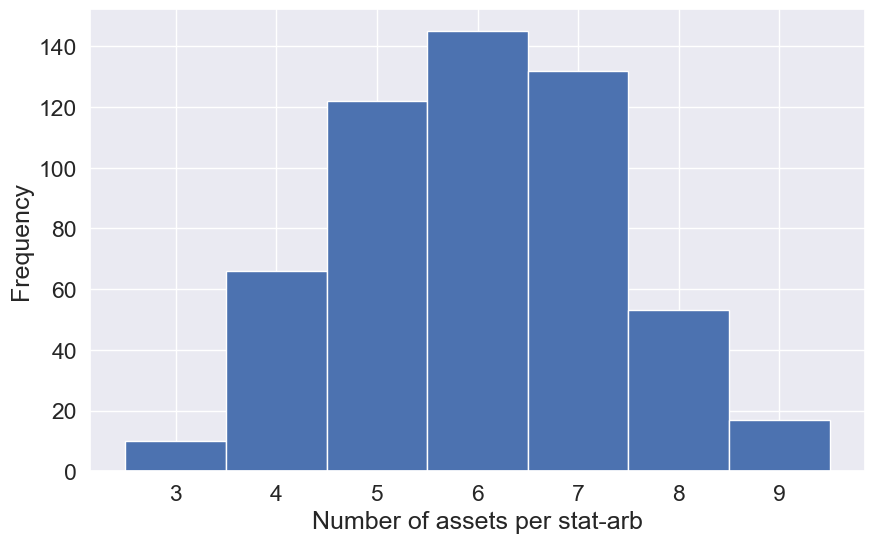

In [59]:
### How many assets per SA on average
lens = []
n_stat_arbs = 0

for res in results:
    stat_arb = res.stat_arb
    lens.append(stat_arb.stocks.shape[0])
    n_stat_arbs += 1

# for group in all_validated_stat_arbs:
#     for arb in group.stat_arbs:
#         lens.append(arb.stocks.shape[0])
#         n_stat_arbs += 1
i=127
K=10
print(f"Total number of (potential) SAs found: {i*K}")
print(f"Average number of assets per SA: {np.mean(lens):.1f}")
print(f"Median number of assets per SA: {np.median(lens):.1f}")
print(f"Total number of validated SAs: {n_stat_arbs}")
print(f"max: {np.max(lens)}")
print(f"min: {np.min(lens)}")
plt.hist(lens, bins=np.arange(2.5, 10.5, 1));
plt.xlabel("Number of assets per stat-arb")
plt.ylabel("Frequency");


### Profits after transaction costs

In [60]:
all_traded_assets = []

for portfolio in portfolios:
    all_traded_assets += portfolio.stocks.columns.tolist()
all_traded_assets = list(set(all_traded_assets))

trading_cost_model=SpreadCostModel(spreads[all_traded_assets])


portfolios_after_cost = []

levs = []
for i, portfolio in enumerate(portfolios):
    res = results[i]
    portfolios_after_cost.append(
        simulate(res, portfolio, trading_cost_model, 0.5)
    )


Portfolio went bust at 2012-11-30 00:00:00
bust_sort: 1

Portfolio went bust at 2013-10-16 00:00:00
bust_sort: 1

Portfolio went bust at 2013-10-25 00:00:00
bust_sort: 1

Portfolio went bust at 2017-11-29 00:00:00
bust_sort: 1

Portfolio went bust at 2018-01-09 00:00:00
bust_sort: 1

Portfolio went bust at 2018-01-29 00:00:00
bust_sort: 1

Portfolio went bust at 2019-04-17 00:00:00
bust_sort: 1

Portfolio went bust at 2019-04-16 00:00:00
bust_sort: 1

Portfolio went bust at 2019-04-17 00:00:00
bust_sort: 1

Portfolio went bust at 2020-02-07 00:00:00
bust_sort: 1

Portfolio went bust at 2020-02-10 00:00:00
bust_sort: 1

Portfolio went bust at 2020-01-09 00:00:00
bust_sort: 1

Portfolio went bust at 2020-03-12 00:00:00
bust_sort: 1

Portfolio went bust at 2020-03-18 00:00:00
bust_sort: 1

Portfolio went bust at 2020-03-12 00:00:00
bust_sort: 1

Portfolio went bust at 2020-03-12 00:00:00
bust_sort: 1

Portfolio went bust at 2020-03-12 00:00:00
bust_sort: 1

Portfolio went bust at 2020-03

In [61]:
stat_arb_metrics = metrics(portfolios_after_cost, results)

100%|██████████| 545/545 [00:28<00:00, 18.90it/s]


In [62]:
avg_lens = np.mean(lens)
median_len = np.median(lens)
n_unique_stat_arbs = n_stat_arbs

means = stat_arb_metrics.means
stdevs = stat_arb_metrics.stdevs
sharpes = stat_arb_metrics.sharpes
profits = stat_arb_metrics.profits
min_navs = stat_arb_metrics.min_navs
min_cum_prof = stat_arb_metrics.min_cum_prof
drawdowns = stat_arb_metrics.drawdowns

print(f"Average number of assets per SA: {avg_lens:.1f}")
print(f"Median number of assets per SA: {median_len:.1f}")
print(f"Number of unique SAs: {n_unique_stat_arbs}")
print(f"Mean profit: {profits.mean():.2f}")
print(f"Median profit: {profits.median():.2f}")
print(f"Std profit: {profits.std():.2f}")
print(f"75th percentile: {profits.quantile(0.75):.2f}")
print(f"25th percentile: {profits.quantile(0.25):.2f}")
print(f"Fraction profitable: {(profits > 0).mean():.2f}")
print(f"Average minimum cumulative profit: {min_cum_prof.mean():.2f}")

print("\nMean return")
print(f"Mean return: {means.mean():.2f}")
print(f"Median return: {means.median():.2f}")
# print(f"Std return: {means.std():.2f}")
print(f"75th percentile return: {means.quantile(0.75):.2f}")
print(f"25th percentile return: {means.quantile(0.25):.2f}")
print(f"Fraction positive: {(means > 0).mean():.2f}")


print("\nRisk")
print(f"Mean risk: {stdevs.mean():.2f}")
print(f"Median risk: {stdevs.median():.2f}")
# print(f"Std risk: {stdevs.std():.2f}")
print(f"75th percentile risk: {stdevs.quantile(0.75):.2f}")
print(f"25th percentile risk: {stdevs.quantile(0.25):.2f}")

print("\nSharpe")
print(f"Average Sharpe: {sharpes.mean():.2f}")
print(f"Median Sharpe: {sharpes.median():.2f}")
# print(f"Std Sharpe: {sharpes.std():.2f}")
print(f"75th percentile Sharpe: {sharpes.quantile(0.75):.2f}")
print(f"25th percentile Sharpe: {sharpes.quantile(0.25):.2f}")
print(f"Fraction positive: {(sharpes > 0).mean():.2f}")

print("\nDrawdown")
print(f"Mean drawdown: {drawdowns.mean():.2f}")
print(f"Median drawdown: {drawdowns.median():.2f}")
# print(f"Std drawdown: {drawdowns.std():.2f}")
print(f"75th percentile drawdown: {drawdowns.quantile(0.75):.2f}")
print(f"25th percentile drawdown: {drawdowns.quantile(0.25):.2f}")


Average number of assets per SA: 6.0
Median number of assets per SA: 6.0
Number of unique SAs: 545
Mean profit: -0.21
Median profit: 0.45
Std profit: 3.08
75th percentile: 1.31
25th percentile: -0.94
Fraction profitable: 0.64
Average minimum cumulative profit: -2.24

Mean return
Mean return: 0.11
Median return: 0.18
75th percentile return: 0.33
25th percentile return: -0.02
Fraction positive: 0.73

Risk
Mean risk: 0.32
Median risk: 0.21
75th percentile risk: 0.36
25th percentile risk: 0.12

Sharpe
Average Sharpe: 0.81
Median Sharpe: 1.05
75th percentile Sharpe: 1.80
25th percentile Sharpe: -0.06
Fraction positive: 0.73

Drawdown
Mean drawdown: 0.15
Median drawdown: 0.10
75th percentile drawdown: 0.19
25th percentile drawdown: 0.05


### Number of active stat arbs

In [63]:
times = prices_full.index
n_active = pd.Series(index=times, data=0)

for res in results:
    entry_date = res.metrics.entry_date
    exit_date = res.metrics.exit_date

    n_active.loc[entry_date:exit_date].iloc[:-1] += 1

n_active = n_active[n_active > 0]

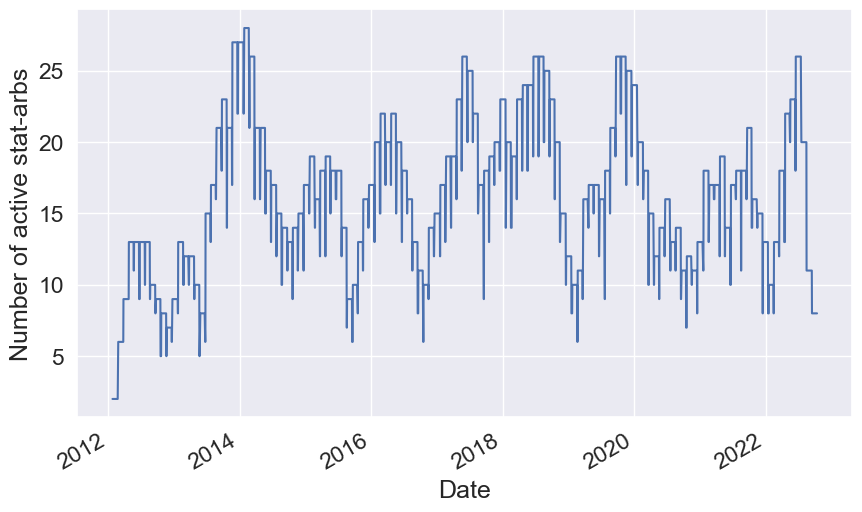

In [64]:
n_active.plot();
plt.ylabel("Number of active stat-arbs");
plt.xlabel("Date");

In [65]:
print(f"Average number of active stat arbs: {n_active.mean():.2f}")
print(f"Median number of active stat arbs: {n_active.median():.2f}")
print(f"Maximum number of active stat arbs: {n_active.max():.2f}")
print(f"Minimum number of active stat arbs: {n_active.min():.2f}")

Average number of active stat arbs: 16.51
Median number of active stat arbs: 17.00
Maximum number of active stat arbs: 28.00
Minimum number of active stat arbs: 2.00


### Visualize

In [66]:
quantile_low = 0.25
quantile_high = 0.734
# get index for 25th and 75th percentile
quantiles = means.quantile([quantile_low, quantile_high])
quantiles

0.250   -0.022474
0.734    0.326485
Name: means, dtype: float64

BERKSHIRE HATHAWAY INC DEL, Finance and Insurance
MASTERCARD INC, Professional, Scientific, and Technical Services
ARCELORMITTAL S A LUXEMBOURG, Manufacturing
EL PASO CORP, Mining, Quarrying, and Oil and Gas Extraction
KINDER MORGAN ENERGY PARTNERS LP, Transportation and Warehousing


stat-arb:  9.8×83443+3.6×91233-1.8×85261-0.9×77481-2.0×77823


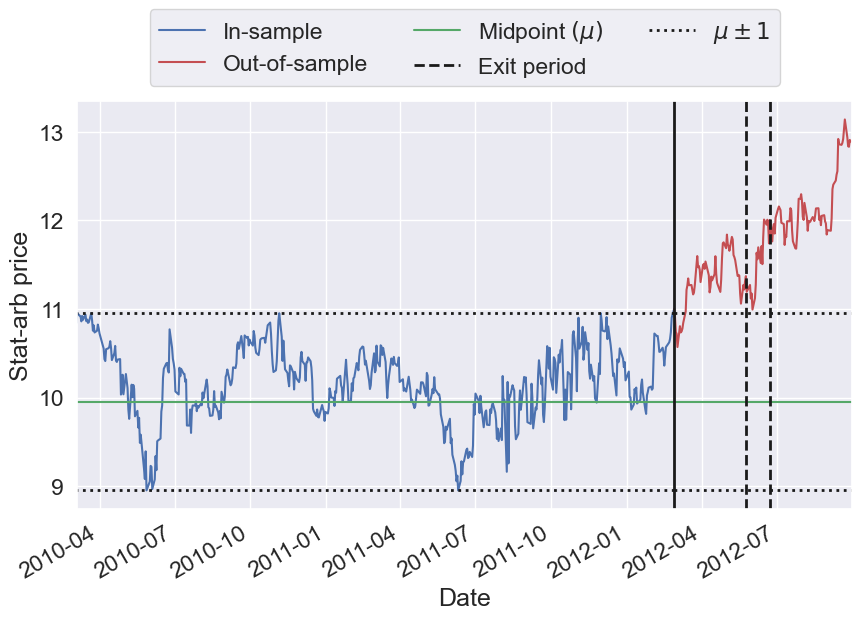

<Figure size 500x500 with 0 Axes>

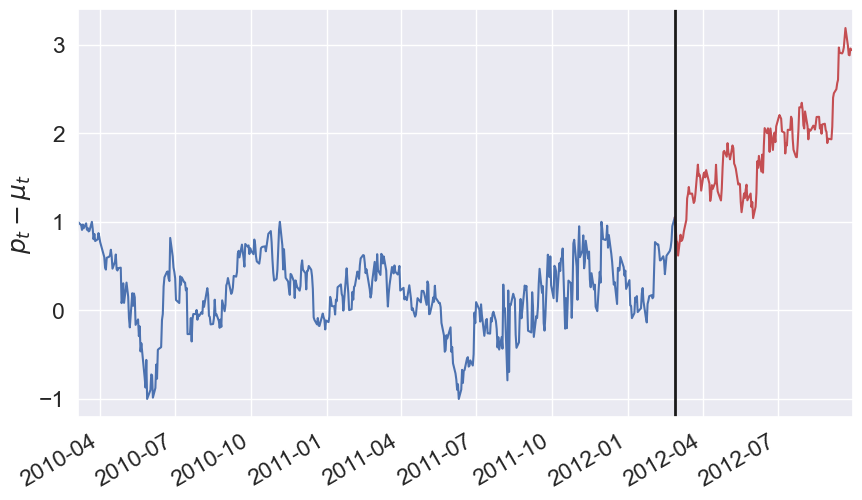

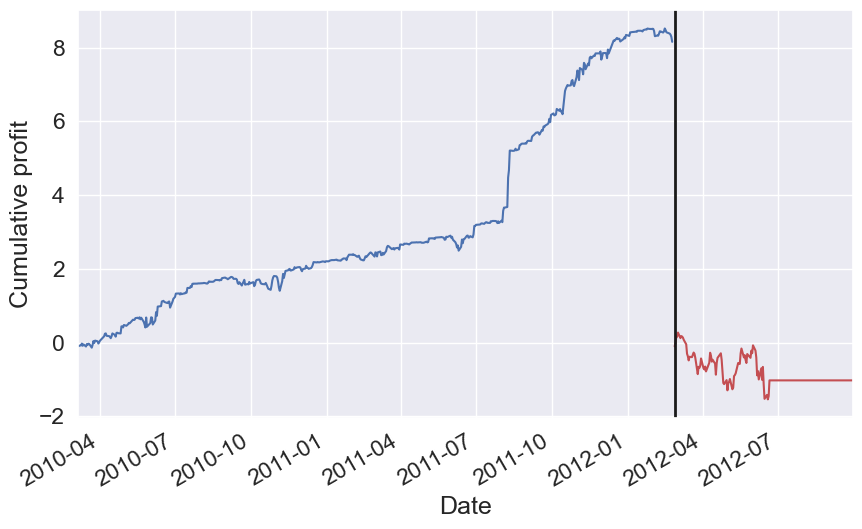

In [81]:
res_low = results[means[(means-quantiles[quantile_low]).abs().argsort()[:1]].index[0]]
stat_arb_names(res_low.stat_arb)
print("\n")
plot_stat_arb(res_low, insample_bound=1, outsample_bound=np.inf, spreads=spreads);

FACEBOOK INC, Information
DISNEY WALT CO, Arts, Entertainment, and Recreation
LILLY ELI & CO, Manufacturing
BIOGEN IDEC INC, Manufacturing
OCCIDENTAL PETROLEUM CORP, Mining, Quarrying, and Oil and Gas Extraction
ALEXION PHARMACEUTICALS INC, Professional, Scientific, and Technical Services


stat-arb:  1.3×13407-2.3×26403+2.3×50876+0.4×76841+4.4×34833+0.5×83111


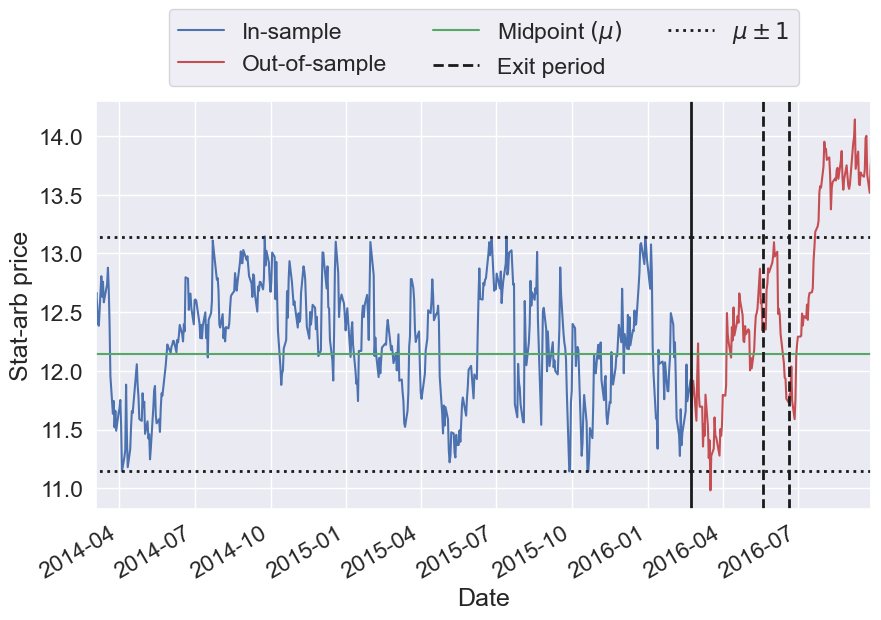

<Figure size 500x500 with 0 Axes>

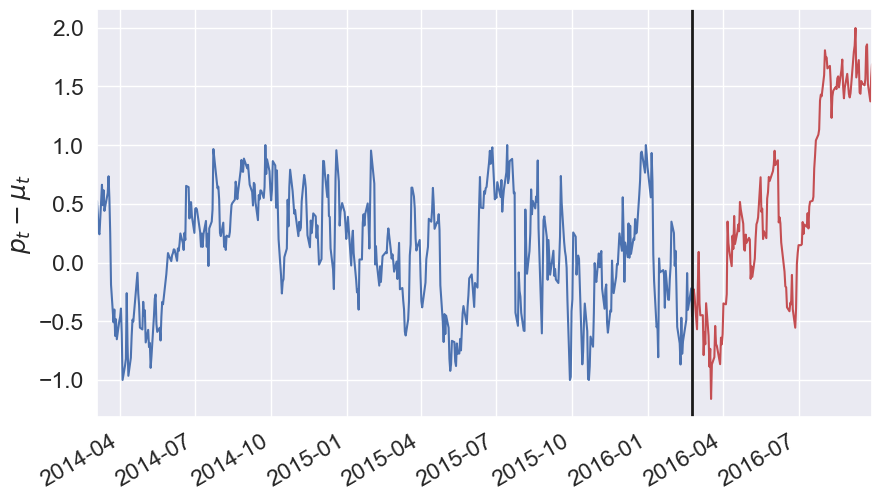

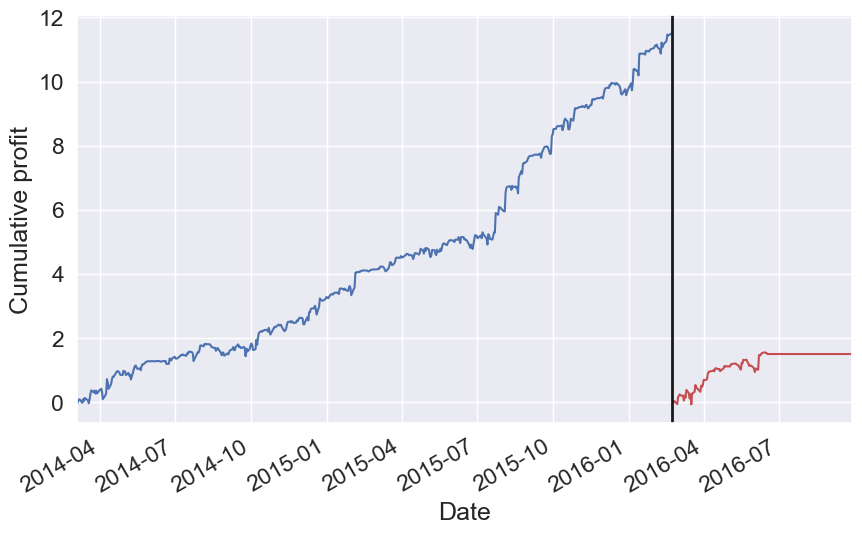

In [80]:
res_high = results[means[(means-quantiles[quantile_high]).abs().argsort()[:1]].index[0]]
stat_arb_names(res_high.stat_arb)
print("\n")

plot_stat_arb(res_high, insample_bound=1, outsample_bound=np.inf, spreads=spreads);